In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [6]:
data.dropna(inplace = True)

In [8]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [28]:
split_1 = int(len(data) * 0.6)
split_2 = int(len(data) * 0.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [26]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [29]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [30]:
model1 = sm.OLS(y_in,X_in).fit()

# 4.) Recreate the graph fro your model

In [14]:
import matplotlib.pyplot as plt

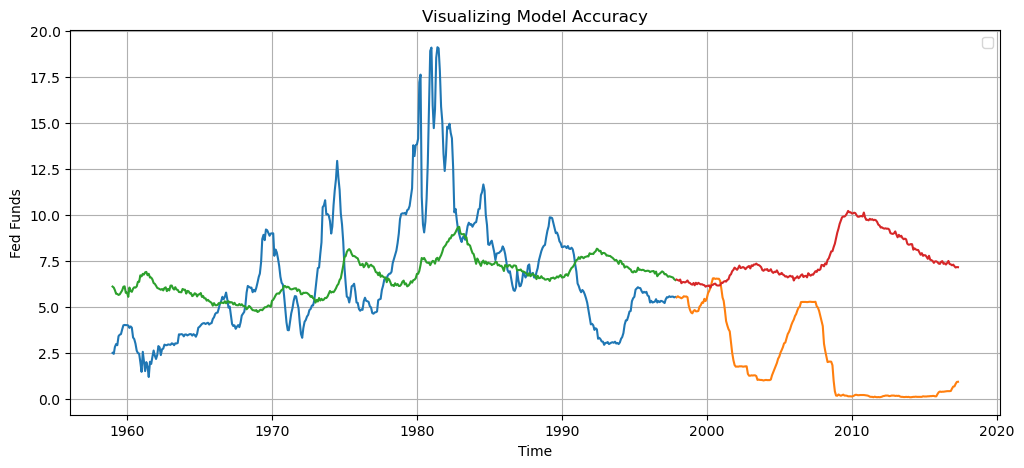

In [32]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
in_mse_1 = mean_squared_error(y_in,model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out,model1.predict(X_out))

In [37]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566723


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
max_degrees =3

DEGREES :  1


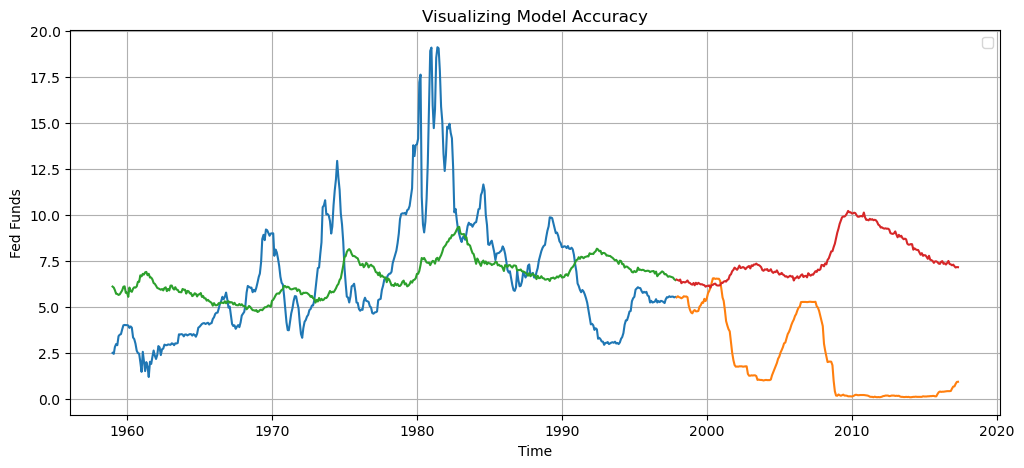

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566789
DEGREES :  2


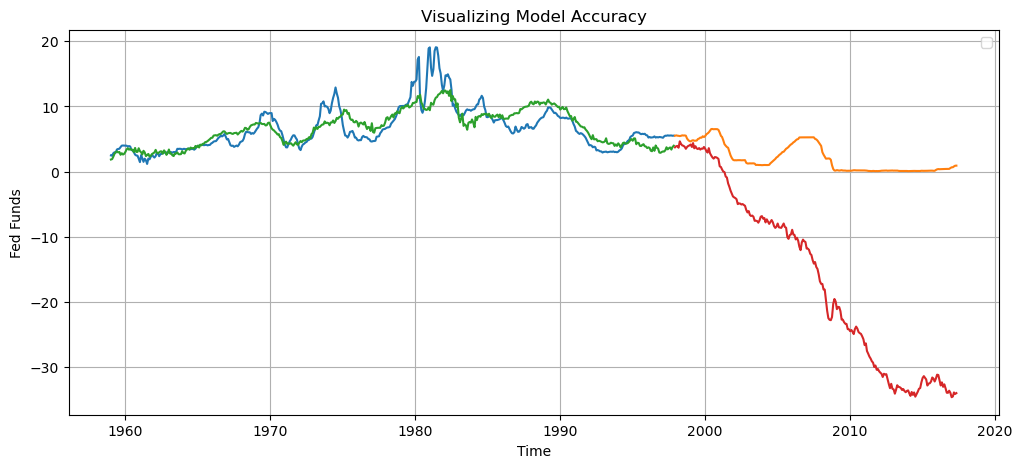

Insample MSE :  3.8634771392760694
Outsample MSE :  481.4465099288575
DEGREES :  3


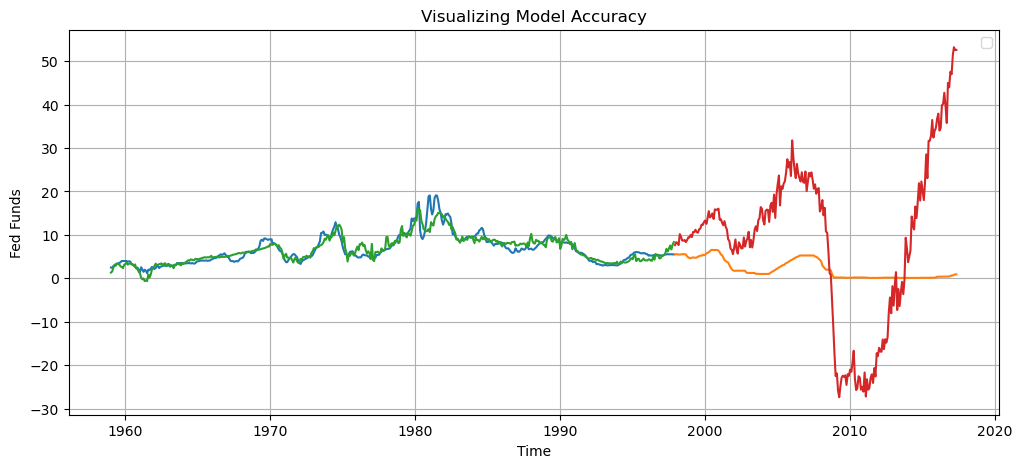

Insample MSE :  1.8723636267299308
Outsample MSE :  371.76787118814127


In [61]:
for degrees in range(1, 1+max_degrees):
    print("DEGREES : ", degrees)
    poly = PolynomialFeatures(degree=degrees)
    X_in_poly=poly.fit_transform(X_in)
    X_out_poly=poly.fit_transform(X_out)
    
    #3
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    #4
    plt.figure(figsize = (12,5))
    in_pred = model1.predict(X_in_poly)
    in_pred = pd.DataFrame(in_pred, index = y_in.index)
    out_pred = model1.predict(X_out_poly)
    out_pred = pd.DataFrame(out_pred, index = y_out.index)
               


    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_pred)
    plt.plot(out_pred)


    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    #5
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

As the degree of the polynomial increases, the model seems to fit the training data (in-sample) better, indicated by a lower in-sample mean squared error (MSE). However, the out-of-sample MSE (the error on the test data) does not consistently decrease, suggesting that increasing complexity does not necessarily lead to better generalization. This is a classic indication of overfitting, where the model learns the noise in the training data rather than the underlying trend.
From the graph :  the blue line represents the actual Federal Funds rate, the green line is the in-sample prediction, and the red line is the out-of-sample prediction. With degree 1 (linear model), the model is not capturing the variability in the data well, resulting in a high bias. As the degree increases to 2 and 3, the model starts to capture more of the variability, but at degree 3, it seems to be capturing too much noise, especially in the out-of-sample predictions, which is a sign of high variance.
The first model, with a degree of 1, has the highest in-sample MSE, indicating a poor fit, yet it generalizes best, with the lowest out-sample MSE. The second model, degree 2, fits the in-sample data better, as shown by a 6-unit decrease in MSE, but its out-sample MSE increases significantly, suggesting overfitting. The third model, degree 3, fits the in-sample data even more closely, with a low MSE of 1.8, but its out-sample MSE, while lower than the second model's, remains substantially higher than the first model's, indicating a trade-off between fit and generalizability.